#### Figure 6

##### Package imports, figure settings, color definitions
<img src="color_pal.png" width="500">

/Users/mlanghinrichs/Documents/Studium/MSc/09_hiwi_hoefer/01_project/memo_py/memo_py/selection.py:18: TqdmExperimentalWarning: Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
  from tqdm.autonotebook import tqdm


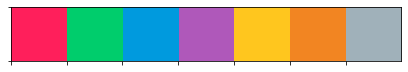

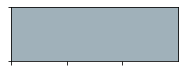

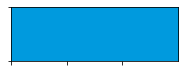

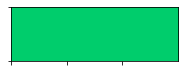

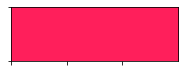

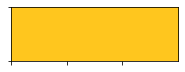

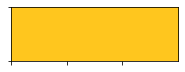

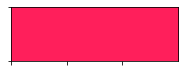

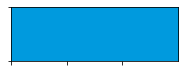

In [1]:
%matplotlib inline
%run settings_load.py

##### Figure 6

##### model topology

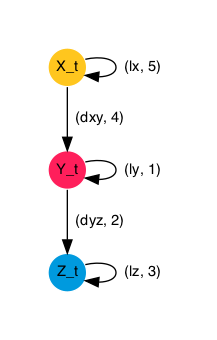

In [15]:
t = [
        {'start': 'X_t', 'end': 'Y_t', 'rate_symbol': 'dxy', 'type': 'S -> E', 'reaction_steps': 4},
        {'start': 'Y_t', 'end': 'Z_t', 'rate_symbol': 'dyz', 'type': 'S -> E', 'reaction_steps': 2},
        {'start': 'X_t', 'end': 'X_t', 'rate_symbol': 'lx', 'type': 'S -> S + S', 'reaction_steps': 5},
        {'start': 'Y_t', 'end': 'Y_t', 'rate_symbol': 'ly', 'type': 'S -> S + S', 'reaction_steps': 1},
        {'start': 'Z_t', 'end': 'Z_t', 'rate_symbol': 'lz', 'type': 'S -> S + S', 'reaction_steps': 3},
        ]

net = me.Network('net_true')
net.structure(t)

# need hex colors here
# "#FF1F5B", "#00CD6C", "#009ADE"
node_settings = {
    'X_t': {'label': 'X_t', 'color': "#FFC61E"},
    'Y_t': {'label': 'Y_t', 'color': "#FF1F5B"},
    'Z_t': {'label': 'Z_t', 'color': "#009ADE"},
}
me.plots.net_main_plot(net, node_settings=node_settings, save='paper_figures/topol_true_model.pdf')
# me.plots.net_hidden_plot(net, layout='dot')

In [6]:
# data and fit of true model
res = pickle.load(open('topology_files/estimation_data_pathway_topology_n1000_t11_2_surround.pickle', 'rb'))
net_names = [est.net.net_name for est in res]
model_probs = me.selection.compute_model_probabilities(res)
data = res[0].data

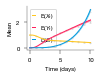

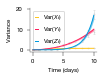

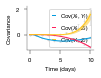

In [12]:
est = res[0]

# repair due to old memopy version
est.net_simulation_credible_band_exists = False
est.net_time_values_dense = est.data_time_values_dense
est.data.data_mean_exists_only = False

plt.rcParams.update({'figure.figsize': (1.2, 0.8)})

settings = {
    'X_t': {'label': 'E$(X_t)$', 'color': ctopx},
    'Y_t': {'label': 'E$(Y_t)$', 'color': ctopy},
    'Z_t': {'label': 'E$(Z_t)$', 'color': ctopz},
}
me.plots.est_bestfit_mean_plot(est, x_label='Time (days)', data=True, cred=True, save='paper_figures/fit_topol_data_mean_net42513.pdf', settings=settings)

settings = {
    ('X_t', 'X_t'): {'label': 'Var$(X_t)$', 'color': ctopx},
    ('Y_t', 'Y_t'): {'label': 'Var$(Y_t)$', 'color': ctopy},
    ('Z_t', 'Z_t'): {'label': 'Var$(Z_t)$', 'color': ctopz}
}
me.plots.est_bestfit_variance_plot(est, x_label='Time (days)', data=True, cred=True, save='paper_figures/fit_topol_data_var_net42513.pdf', settings=settings)

settings = {
    ('X_t', 'Y_t'): {'label': 'Cov$(X_t, Y_t)$', 'color': ctopz},
    ('X_t', 'Z_t'): {'label': 'Cov$(X_t, Z_t)$', 'color': ctopy},
    ('Y_t', 'Z_t'): {'label': 'Cov$(Y_t, Z_t)$', 'color': ctopx}
}
me.plots.est_bestfit_covariance_plot(est, x_label='Time (days)', data=True, cred=True, save='paper_figures/fit_topol_data_cov_net42513.pdf', settings=settings)

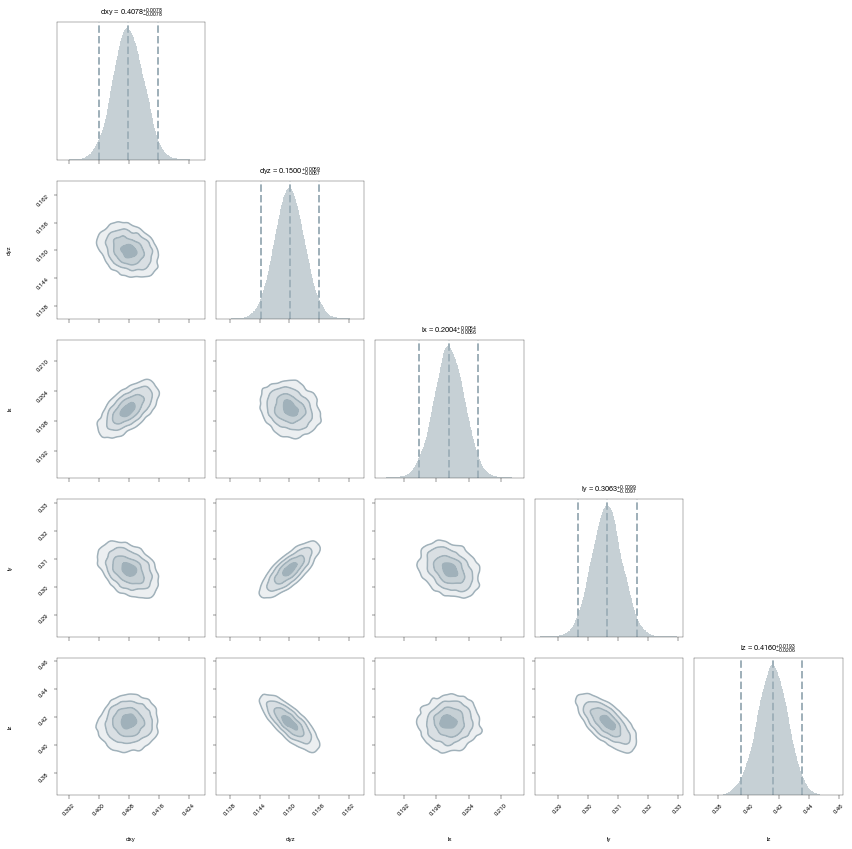

In [13]:
est = res[0]
me.plots.est_corner_kernel_plot(est, save='paper_figures/corner_net42513.pdf')

In [53]:
sns.color_palette('Set2', n_colors=3).as_hex()

['#66c2a5', '#fc8d62', '#8da0cb']

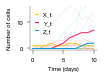

In [54]:
plt.rcParams.update({'figure.figsize': (1.2, 0.8)})
ax = plt.gca()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(True)
ax.spines['left'].set_visible(True)

trace_emph = 4
for trace_i in range(10):
    if trace_i!=trace_emph:
        plt.plot(data.data_time_values, data.data_counts[trace_i, 0, :], color=ctopx, alpha=0.15, linewidth=0.5)
        plt.plot(data.data_time_values, data.data_counts[trace_i, 1, :], color=ctopy, alpha=0.15, linewidth=0.5)
        plt.plot(data.data_time_values, data.data_counts[trace_i, 2, :], color=ctopz, alpha=0.15, linewidth=0.5)
    else:
        plt.plot(data.data_time_values, data.data_counts[trace_i, 0, :], color=ctopx, alpha=1.0, linewidth=1.0, label='X_t', zorder=1000) # color='darkgreen'
        plt.plot(data.data_time_values, data.data_counts[trace_i, 1, :], color=ctopy, alpha=1.0, linewidth=1.0, label='Y_t', zorder=1000) # color='darkblue'
        plt.plot(data.data_time_values, data.data_counts[trace_i, 2, :], color=ctopz, alpha=1.0, linewidth=1.0, label='Z_t', zorder=1000) # color='darkblue'

# ax.set_ylim([-0.3, None])
leg = plt.legend()
plt.legend(frameon=False)
# leg.get_frame().set_edgecolor('lightgrey')
plt.ylim((-0.5, 16))
plt.xlabel('Time (days)')
plt.ylabel('Number of cells')
plt.savefig(f'paper_figures/data_topol_single_well_traces.pdf', bbox_inches='tight')

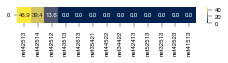

In [55]:
sort_inds = np.array(- model_probs).argsort()
net_names_sorted = np.array(net_names)[sort_inds]
model_probs_sorted = np.array(model_probs)[sort_inds]

plt.figure(figsize=(4.0,0.3))
df = pd.DataFrame(np.array([model_probs_sorted]) * 100.0, columns=net_names_sorted) # , index=rows
sns.heatmap(df, cmap='cividis', annot=True, fmt='.1f') # 'plasma' # annot=True
plt.yticks(rotation=0, va='center')
plt.xticks(rotation=90)
plt.savefig('paper_figures/topol_top_models.pdf', bbox_inches='tight')

##### topology A (true) results

In [42]:
res_evids = pickle.load(open('topology_files/estimation_data_pathway_topology_n1000_t11_2_toptrue3125_evids.pickle', 'rb'))
print(len(res_evids))

3125


In [43]:
net_names = [e[0] for e in res_evids]
log_evids = np.array([e[1] for e in res_evids])
model_probs = me.selection.compute_model_probabilities_from_log_evidences(log_evids)
print(net_names[list(model_probs).index(max(model_probs))])
sort_inds = np.array(- model_probs).argsort()
net_names_sorted = np.array(net_names)[sort_inds]
model_probs_sorted = np.array(model_probs)[sort_inds]
log_evids_sorted = log_evids[sort_inds]

net42513


In [44]:
print(model_probs_sorted[:10])
print(net_names_sorted[:10])
print(log_evids_sorted[:10])

[4.01548985e-01 2.65501834e-01 1.81420908e-01 1.14624984e-01
 3.60233626e-02 8.68690121e-04 1.06347828e-05 4.87541599e-07
 5.78062316e-08 5.56034643e-08]
['net42513' 'net42514' 'net42515' 'net42512' 'net43511' 'net43512'
 'net43513' 'net43514' 'net42511' 'net43515']
[225.88878037 225.47507258 225.09427062 224.63511663 223.47761852
 219.75268202 215.34982558 212.2673159  210.13503686 210.09618578]


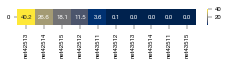

In [16]:
plt.figure(figsize=(4.0,0.3))
df = pd.DataFrame(np.array([model_probs_sorted[:10] * 100.0]), columns=net_names_sorted[:10]) # , index=rows
sns.heatmap(df, cmap='cividis', annot=True, fmt='.1f') # 'plasma' # annot=True
plt.yticks(rotation=0, va='center')
plt.xticks(rotation=90)
plt.savefig('paper_figures/topol_top_models_A.pdf', bbox_inches='tight')

##### topology B results

In [45]:
res_evids1 = pickle.load(open('topology_files/estimation_data_pathway_topology_n1000_t11_2_topB3125_part1_evids.pickle', 'rb'))
res_evids2 = pickle.load(open('topology_files/estimation_data_pathway_topology_n1000_t11_2_topB3125_part2_evids.pickle', 'rb'))
res_evids3 = pickle.load(open('topology_files/estimation_data_pathway_topology_n1000_t11_2_topB3125_part3_evids.pickle', 'rb'))
res_evids = res_evids1 + res_evids2 + res_evids3
print(len(res_evids))

3125


In [46]:
net_names = [e[0] for e in res_evids]
log_evids = np.array([e[1] for e in res_evids])
model_probs = me.selection.compute_model_probabilities_from_log_evidences(log_evids)
print(net_names[list(model_probs).index(max(model_probs))])
sort_inds = np.array(- model_probs).argsort()
net_names_sorted = np.array(net_names)[sort_inds]
model_probs_sorted = np.array(model_probs)[sort_inds]
log_evids_sorted = log_evids[sort_inds]

net51212


In [47]:
print(model_probs_sorted[:10])
print(net_names_sorted[:10])
print(log_evids_sorted[:10])

[1.00000000e+00 4.63105079e-11 1.60171055e-14 3.70226979e-19
 5.40904368e-21 2.57726313e-21 1.10924191e-30 6.61394015e-35
 2.11879657e-38 1.78506714e-42]
['net51212' 'net51213' 'net51222' 'net51232' 'net51242' 'net51252'
 'net51223' 'net51214' 'net51233' 'net51243']
[-3516.83747937 -3540.6331316  -3548.60259852 -3559.27765005
 -3563.50369402 -3564.24503829 -3585.81135534 -3595.53877806
 -3603.58486463 -3612.96659725]


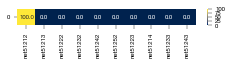

In [137]:
plt.figure(figsize=(4.0,0.3))
df = pd.DataFrame(np.array([model_probs_sorted[:10] * 100.0]), columns=net_names_sorted[:10]) # , index=rows
sns.heatmap(df, cmap='cividis', annot=True, fmt='.1f') # 'plasma' # annot=True
plt.yticks(rotation=0, va='center')
plt.xticks(rotation=90)
plt.savefig('paper_figures/topol_top_models_B.pdf', bbox_inches='tight')

In [138]:
net_names = [est.net.net_name for est in res]
model_probs = me.selection.compute_model_probabilities(res)
data = res[0].data

##### topology C results

In [39]:
res_evids1 = pickle.load(open('topology_files/estimation_data_pathway_topology_n1000_t11_2_topC3125_part1_evids.pickle', 'rb'))
res_evids2 = pickle.load(open('topology_files/estimation_data_pathway_topology_n1000_t11_2_topC3125_part2_evids.pickle', 'rb'))
res_evids = res_evids1 + res_evids2
print(len(res_evids))

3125


In [40]:
net_names = [e[0] for e in res_evids]
log_evids = np.array([e[1] for e in res_evids])
model_probs = me.selection.compute_model_probabilities_from_log_evidences(log_evids)
print(net_names[list(model_probs).index(max(model_probs))])
sort_inds = np.array(- model_probs).argsort()
net_names_sorted = np.array(net_names)[sort_inds]
model_probs_sorted = np.array(model_probs)[sort_inds]
log_evids_sorted = log_evids[sort_inds]

net35515


In [41]:
print(model_probs_sorted[:10])
print(net_names_sorted[:10])
print(log_evids_sorted[:10])

[9.89435443e-01 1.04782609e-02 8.01854396e-05 3.66500769e-06
 2.44255197e-06 2.95692242e-09 5.02428379e-11 4.56107827e-13
 8.37346281e-14 1.24742827e-15]
['net35515' 'net35514' 'net35415' 'net35513' 'net35414' 'net35413'
 'net45515' 'net45514' 'net35512' 'net35412']
[-277.51157381 -282.05940561 -286.93212166 -290.01763318 -290.42342023
 -297.14006989 -301.21510616 -305.9170002  -307.61207684 -311.8186454 ]


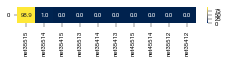

In [150]:
plt.figure(figsize=(4.0,0.3))
df = pd.DataFrame(np.array([model_probs_sorted[:10] * 100.0]), columns=net_names_sorted[:10]) # , index=rows
sns.heatmap(df, cmap='cividis', annot=True, fmt='.1f') # 'plasma' # annot=True
plt.yticks(rotation=0, va='center')
plt.xticks(rotation=90)
plt.savefig('paper_figures/topol_top_models_C.pdf', bbox_inches='tight')

##### summary

In [42]:
evidsA = pickle.load(open('topology_files/estimation_data_pathway_topology_n1000_t11_2_toptrue3125_evids.pickle', 'rb'))
evidsB1 = pickle.load(open('topology_files/estimation_data_pathway_topology_n1000_t11_2_topB3125_part1_evids.pickle', 'rb'))
evidsB2 = pickle.load(open('topology_files/estimation_data_pathway_topology_n1000_t11_2_topB3125_part2_evids.pickle', 'rb'))
evidsB3 = pickle.load(open('topology_files/estimation_data_pathway_topology_n1000_t11_2_topB3125_part3_evids.pickle', 'rb'))
evidsC1 = pickle.load(open('topology_files/estimation_data_pathway_topology_n1000_t11_2_topC3125_part1_evids.pickle', 'rb')) 
evidsC2 = pickle.load(open('topology_files/estimation_data_pathway_topology_n1000_t11_2_topC3125_part2_evids.pickle', 'rb'))

evidsB = evidsB1 + evidsB2 + evidsB3
evidsC = evidsC1 + evidsC2
print(len(evidsA), len(evidsB), len(evidsC))

logevidsall = np.array([e[1] for e in evidsA+evidsB+evidsC])
print(len(logevidsall))
namesall = np.array(['A' + e[0][3:] for e in evidsA] + ['B' + e[0][3:] for e in evidsB] + ['C' + e[0][3:] for e in evidsC])

3125 3125 3125
9375


In [43]:
model_probs = me.selection.compute_model_probabilities_from_log_evidences(logevidsall)
print(namesall[list(model_probs).index(max(model_probs))])
sort_inds = np.array(- model_probs).argsort()
namesall_sorted = np.array(namesall)[sort_inds]
model_probs_sorted = np.array(model_probs)[sort_inds]

A42513


In [49]:
print(model_probs_sorted[:10])
print(sum(model_probs_sorted[:4]))
print(model_probs_sorted[6]*100)

[4.01548985e-01 2.65501834e-01 1.81420908e-01 1.14624984e-01
 3.60233626e-02 8.68690121e-04 1.06347828e-05 4.87541599e-07
 5.78062316e-08 5.56034643e-08]
0.9630967108000416
0.0010634782764506088


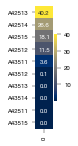

In [14]:
plt.figure(figsize=(0.4,2.25))
df = pd.DataFrame(np.array(model_probs_sorted[:10] * 100.0), index=namesall_sorted[:10]) # , index=rows
sns.heatmap(df, cmap='cividis', annot=True, fmt='.1f') # 'plasma' # annot=True
plt.yticks(rotation=0, va='center')
plt.xticks(rotation=90)
plt.savefig('paper_figures/topol_top_models_all.pdf', bbox_inches='tight')

0.9999999999999934 0.0 9.646173351363013e-220


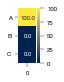

In [163]:
probssumA = np.sum(model_probs[:3125])
probssumB = np.sum(model_probs[3125:6250])
probssumC = np.sum(model_probs[6250:])
print(probssumA, probssumB, probssumC)

plt.figure(figsize=(0.4,1))
df = pd.DataFrame(np.array([probssumA, probssumB, probssumC]) * 100.0, index=['A', 'B', 'C']) # , index=rows
sns.heatmap(df, cmap='cividis', annot=True, fmt='.1f') # 'plasma' # annot=True
plt.yticks(rotation=0, va='center')
plt.savefig('paper_figures/topol_summary_probs.pdf', bbox_inches='tight')
plt.show()

##### mean-only fits: topology A (true) results

In [34]:
res_evids = pickle.load(open('topology_files/estimation_data_pathway_topology_n1000_t11_2_toptrue3125_meanfit_evids.pickle', 'rb'))
print(len(res_evids))

3125


In [35]:
net_names = [e[0] for e in res_evids]
log_evids = np.array([e[1] for e in res_evids])
model_probs = me.selection.compute_model_probabilities_from_log_evidences(log_evids)
print(net_names[list(model_probs).index(max(model_probs))])
sort_inds = np.array(- model_probs).argsort()
net_names_sorted = np.array(net_names)[sort_inds]
model_probs_sorted = np.array(model_probs)[sort_inds]
log_evids_sorted = log_evids[sort_inds]

netA44525


In [36]:
print(model_probs_sorted[:10])
print(net_names_sorted[:10])
print(log_evids_sorted[:10])

[0.07847048 0.07106273 0.06899694 0.05947225 0.05830379 0.05389943
 0.05335568 0.05322835 0.04962098 0.04865048]
['netA44525' 'netA43511' 'netA44524' 'netA43512' 'netA44523' 'netA45525'
 'netA42514' 'netA43513' 'netA42513' 'netA43514']
[74.46924664 74.37008712 74.34058626 74.19203396 74.17219114 74.09364407
 74.08350461 74.0811152  74.01093785 73.99118587]


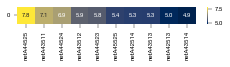

In [12]:
plt.figure(figsize=(4.0,0.3))
df = pd.DataFrame(np.array([model_probs_sorted[:10] * 100.0]), columns=net_names_sorted[:10]) # , index=rows
sns.heatmap(df, cmap='cividis', annot=True, fmt='.1f') # 'plasma' # annot=True
plt.yticks(rotation=0, va='center')
plt.xticks(rotation=90)
plt.savefig('paper_figures/topol_top_models_A_meanfit.pdf', bbox_inches='tight')

##### mean-only fits: topology B results
ADD HERE

##### mean-only fits: topology C results

In [31]:
res_evids = pickle.load(open('topology_files/estimation_data_pathway_topology_n1000_t11_2_topC3125_meanfit_evids.pickle', 'rb'))
print(len(res_evids))

3125


In [32]:
net_names = [e[0] for e in res_evids]
log_evids = np.array([e[1] for e in res_evids])
model_probs = me.selection.compute_model_probabilities_from_log_evidences(log_evids)
print(net_names[list(model_probs).index(max(model_probs))])
sort_inds = np.array(- model_probs).argsort()
net_names_sorted = np.array(net_names)[sort_inds]
model_probs_sorted = np.array(model_probs)[sort_inds]
log_evids_sorted = log_evids[sort_inds]

netC54511


In [33]:
print(model_probs_sorted[:10])
print(net_names_sorted[:10])
print(log_evids_sorted[:10])

[9.83378025e-01 6.86632817e-03 4.86641801e-03 2.80784344e-03
 7.71997028e-04 5.90112606e-04 3.95071327e-04 1.58622208e-04
 4.51142572e-05 4.20147028e-05]
['netC54511' 'netC54512' 'netC55511' 'netC53511' 'netC54513' 'netC44411'
 'netC54514' 'netC54515' 'netC54521' 'netC43411']
[17.02550204 12.06113792 11.71686658 11.16692516  9.87573385  9.60706653
  9.20581947  8.29327848  7.03595147  6.96477277]


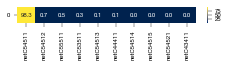

In [20]:
plt.figure(figsize=(4.0,0.3))
df = pd.DataFrame(np.array([model_probs_sorted[:10] * 100.0]), columns=net_names_sorted[:10]) # , index=rows
sns.heatmap(df, cmap='cividis', annot=True, fmt='.1f') # 'plasma' # annot=True
plt.yticks(rotation=0, va='center')
plt.xticks(rotation=90)
plt.savefig('paper_figures/topol_top_models_C_meanfit.pdf', bbox_inches='tight')

##### mean-only fits: summary
NOTE: still it seems, that A (true) topology can be identified from mean-only data which is maybe not expected; not clear if this data really contains this or we just underexplore the topology space for B and C topology as they touch bounds in the steps (as also for full data, but there the data should contain this info); so I wouldn't claim mean-only works that strongly (keep this data more as backup), it could however really be that it contains it given our synchronous initial conditions and dense time values (as this transition also seemed smooth for CD44 data and not binary in the sense that var/cov are needed, so just make it better if time points are too sparse and similar arguments)

In [23]:
evidsA = pickle.load(open('topology_files/estimation_data_pathway_topology_n1000_t11_2_toptrue3125_meanfit_evids.pickle', 'rb'))
# evidsB1 = pickle.load(open('topology_files/estimation_data_pathway_topology_n1000_t11_2_topB3125_part1_evids.pickle', 'rb'))
# evidsB2 = pickle.load(open('topology_files/estimation_data_pathway_topology_n1000_t11_2_topB3125_part2_evids.pickle', 'rb'))
# evidsB3 = pickle.load(open('topology_files/estimation_data_pathway_topology_n1000_t11_2_topB3125_part3_evids.pickle', 'rb'))
evidsC = pickle.load(open('topology_files/estimation_data_pathway_topology_n1000_t11_2_topC3125_meanfit_evids.pickle', 'rb')) 

# evidsB = evidsB1 + evidsB2 + evidsB3
print(len(evidsA), 
#       len(evidsB), 
      len(evidsC))

logevidsall = np.array([e[1] for e in evidsA+
#                         evidsB+
                        evidsC])
print(len(logevidsall))
namesall = np.array([e[0][3:] for e in evidsA] + 
#                     [e[0][3:] for e in evidsB] + 
                    [e[0][3:] for e in evidsC])

3125 3125
6250


In [25]:
model_probs = me.selection.compute_model_probabilities_from_log_evidences(logevidsall)
print(namesall[list(model_probs).index(max(model_probs))])
sort_inds = np.array(- model_probs).argsort()
namesall_sorted = np.array(namesall)[sort_inds]
model_probs_sorted = np.array(model_probs)[sort_inds]

A44525


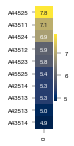

In [26]:
plt.figure(figsize=(0.4,2.25))
df = pd.DataFrame(np.array(model_probs_sorted[:10] * 100.0), index=namesall_sorted[:10]) # , index=rows
sns.heatmap(df, cmap='cividis', annot=True, fmt='.1f') # 'plasma' # annot=True
plt.yticks(rotation=0, va='center')
plt.xticks(rotation=90)
plt.savefig('paper_figures/topol_top_models_all_meanfit.pdf', bbox_inches='tight')

In [30]:
print(np.sum(model_probs[:3125]))
print(np.sum(model_probs[3125:6250]))

1.0000000000000042
9.005016536379891e-27


0.9999999999999934 0.0 9.646173351363013e-220


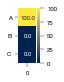

In [163]:
probssumA = np.sum(model_probs[:3125])
probssumB = np.sum(model_probs[3125:6250])
probssumC = np.sum(model_probs[6250:])
print(probssumA, probssumB, probssumC)

plt.figure(figsize=(0.4,1))
df = pd.DataFrame(np.array([probssumA, probssumB, probssumC]) * 100.0, index=['A', 'B', 'C']) # , index=rows
sns.heatmap(df, cmap='cividis', annot=True, fmt='.1f') # 'plasma' # annot=True
plt.yticks(rotation=0, va='center')
plt.savefig('paper_figures/topol_summary_probs_meanfit.pdf', bbox_inches='tight')
plt.show()

##### true model tests
- fit true model to own data (normal and meanfit)
- compare parameter posteriors (completely identifiable in both cases?)

In [14]:
data = pickle.load(open('topology_files/data_pathway_topology_n1000_t11_2.pickle', 'rb'))

In [15]:
data

In [16]:
topology = [
    {'start': 'X_t', 'end': 'Y_t', 'rate_symbol': 'dxy', 'type': 'S -> E', 'reaction_steps': 4},
    {'start': 'Y_t', 'end': 'Z_t', 'rate_symbol': 'dyz', 'type': 'S -> E', 'reaction_steps': 2},
    {'start': 'X_t', 'end': 'X_t', 'rate_symbol': 'lx', 'type': 'S -> S + S', 'reaction_steps': 5},
    {'start': 'Y_t', 'end': 'Y_t', 'rate_symbol': 'ly', 'type': 'S -> S + S', 'reaction_steps': 1},
    {'start': 'Z_t', 'end': 'Z_t', 'rate_symbol': 'lz', 'type': 'S -> S + S', 'reaction_steps': 3},
    ]

net = me.Network('net42513')
net.structure(topology)

nets = [net]
variables = [{'X_t': ('X_t', ), 'Y_t': ('Y_t', ), 'Z_t': ('Z_t', )}]*len(nets)
initial_values = [{'X_t': 1.0, 'Y_t': 0.0, 'Z_t': 0.0}]*len(nets)
theta_bounds = [{'dxy': (0.0, 1.0), 'dyz': (0.0, 1.0), 
                 'lx': (0.0, 1.0), 'ly': (0.0, 1.0), 'lz': (0.0, 1.0)}]*len(nets)
fit_mean_only = False # True or False

In [17]:
res = me.select_models(nets, variables, initial_values,
                    theta_bounds, data,
                    fit_mean_only=fit_mean_only,
                    nlive=1000, tolerance=0.01, parallel=False)

In [26]:
est = res[0]
est.bay_est_log_evidence

226.1541441603174

In [23]:
# compare to surround fit run
res_surround = pickle.load(open('topology_files/estimation_data_pathway_topology_n1000_t11_2_surround.pickle', 'rb'))
net_names = [est.net.net_name for est in res_surround]
model_probs = me.selection.compute_model_probabilities(res_surround)
print(net_names, model_probs)

['net42513', 'net32513', 'net52513', 'net41513', 'net43513', 'net42413', 'net42613', 'net42523', 'net42512', 'net42514', 'net34422', 'net35421', 'net44522'] [4.69241076e-01 1.17050761e-35 5.51607770e-27 7.95253734e-78
 1.41944097e-05 2.32393276e-20 1.79206217e-07 1.60729226e-63
 1.36491483e-01 3.94253067e-01 4.46286032e-19 9.93963416e-16
 1.49382334e-16]


In [28]:
res_surround[0].bay_est_log_evidence

225.61184594929145

In [29]:
me.selection.compute_model_probabilities_from_log_evidences(np.array([226.15, 225.61]))

array([0.63181242, 0.36818758])

226.1541441603174


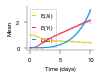

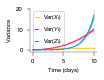

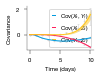

In [32]:
est = res[0]
print(est.bay_est_log_evidence)

# repair due to old memopy version
est.data.data_mean_exists_only = False

plt.rcParams.update({'figure.figsize': (1.2, 0.8)})

settings = {
    'X_t': {'label': 'E$(X_t)$', 'color': ctopx},
    'Y_t': {'label': 'E$(Y_t)$', 'color': ctopy},
    'Z_t': {'label': 'E$(Z_t)$', 'color': ctopz},
}
me.plots.est_bestfit_mean_plot(est, x_label='Time (days)', settings=settings)

settings = {
    ('X_t', 'X_t'): {'label': 'Var$(X_t)$', 'color': ctopx},
    ('Y_t', 'Y_t'): {'label': 'Var$(Y_t)$', 'color': ctopy},
    ('Z_t', 'Z_t'): {'label': 'Var$(Z_t)$', 'color': ctopz}
}
me.plots.est_bestfit_variance_plot(est, x_label='Time (days)', settings=settings)

settings = {
    ('X_t', 'Y_t'): {'label': 'Cov$(X_t, Y_t)$', 'color': ctopz},
    ('X_t', 'Z_t'): {'label': 'Cov$(X_t, Z_t)$', 'color': ctopy},
    ('Y_t', 'Z_t'): {'label': 'Cov$(Y_t, Z_t)$', 'color': ctopx}
}
me.plots.est_bestfit_covariance_plot(est, x_label='Time (days)', settings=settings)

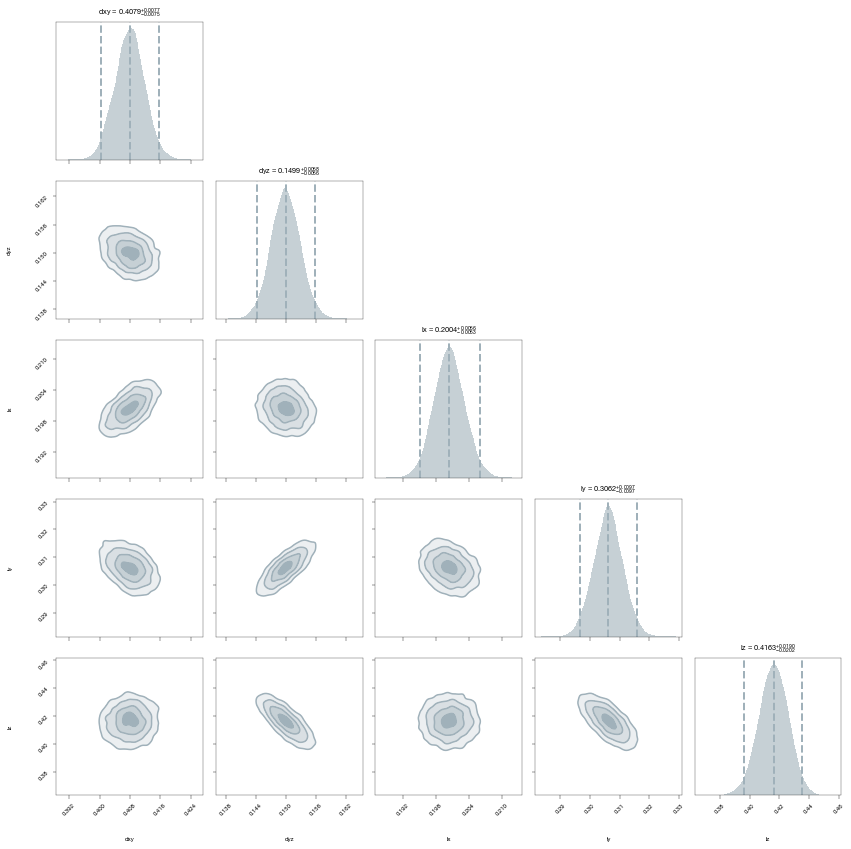

In [33]:
me.plots.est_corner_kernel_plot(est)

In [34]:
fit_mean_only = True
res_meanfit = me.select_models(nets, variables, initial_values,
                    theta_bounds, data,
                    fit_mean_only=fit_mean_only,
                    nlive=1000, tolerance=0.01, parallel=False)

In [36]:
est = res_meanfit[0]
est.bay_est_log_evidence

74.01711488422671

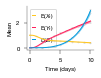

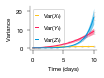

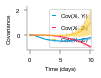

In [37]:
# repair due to old memopy version
est.data.data_mean_exists_only = False

plt.rcParams.update({'figure.figsize': (1.2, 0.8)})

settings = {
    'X_t': {'label': 'E$(X_t)$', 'color': ctopx},
    'Y_t': {'label': 'E$(Y_t)$', 'color': ctopy},
    'Z_t': {'label': 'E$(Z_t)$', 'color': ctopz},
}
me.plots.est_bestfit_mean_plot(est, x_label='Time (days)', settings=settings)

settings = {
    ('X_t', 'X_t'): {'label': 'Var$(X_t)$', 'color': ctopx},
    ('Y_t', 'Y_t'): {'label': 'Var$(Y_t)$', 'color': ctopy},
    ('Z_t', 'Z_t'): {'label': 'Var$(Z_t)$', 'color': ctopz}
}
me.plots.est_bestfit_variance_plot(est, x_label='Time (days)', settings=settings)

settings = {
    ('X_t', 'Y_t'): {'label': 'Cov$(X_t, Y_t)$', 'color': ctopz},
    ('X_t', 'Z_t'): {'label': 'Cov$(X_t, Z_t)$', 'color': ctopy},
    ('Y_t', 'Z_t'): {'label': 'Cov$(Y_t, Z_t)$', 'color': ctopx}
}
me.plots.est_bestfit_covariance_plot(est, x_label='Time (days)', settings=settings)

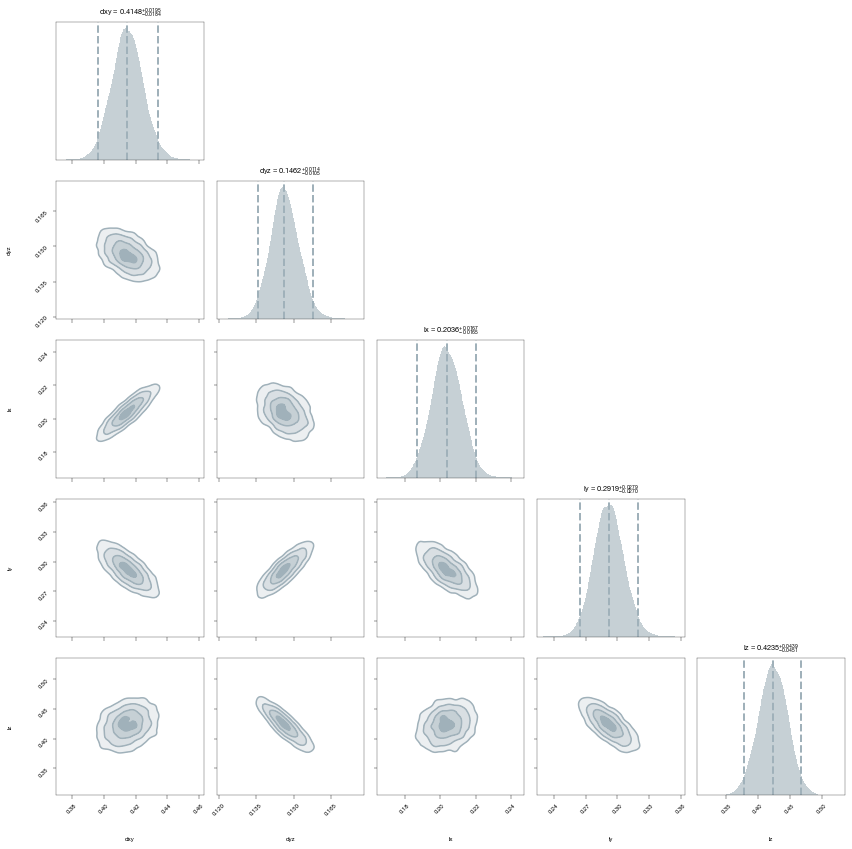

74.01711488422671


In [39]:
me.plots.est_corner_kernel_plot(est)
print(est.bay_est_log_evidence)

In [41]:
data.data_counts.shape

(1000, 3, 11)